This work is by "Nur Zengin", 2021


In this work, we will practice basic classification algorithms including the kNN (k-Nearest Neighbors), Suport vector Classification (SVM), XGBoost, Decision Tree and Random Forest. 

We will use the Iris dataset consisting of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The **goal** is to train classification algorithm to distinguish the species from one another.

In [1]:
# Here are all imports that you will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import neighbors

In [2]:
#Load the dataset
df = sns.load_dataset('iris')

In [3]:
#Display the first 5 rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


For the first set of data shown above, we can see only setosa class is given and the values are almost the same varying from 4.6 cm to 5.1 cm for sepal length, 3.1 cm to 3.6 cm for sepal width, 1.3 cm to 1.5 cm for petal length and 0.2 cm for petal width.

**Scatter plots - sepal_width vs sepal_length and petal_width vs petal_length. Scatter plots show each class in different color.**

/Users/nyarbasi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


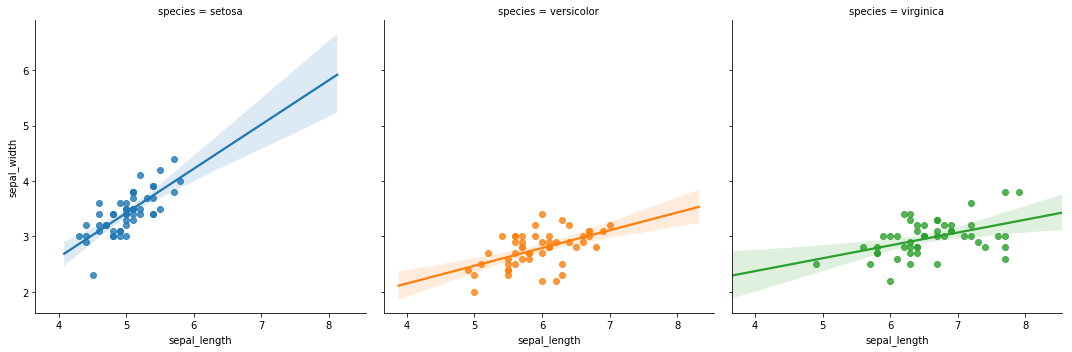

In [4]:
sns.lmplot(x = 'sepal_length', y = 'sepal_width', data = df, hue = 'species', col = 'species');

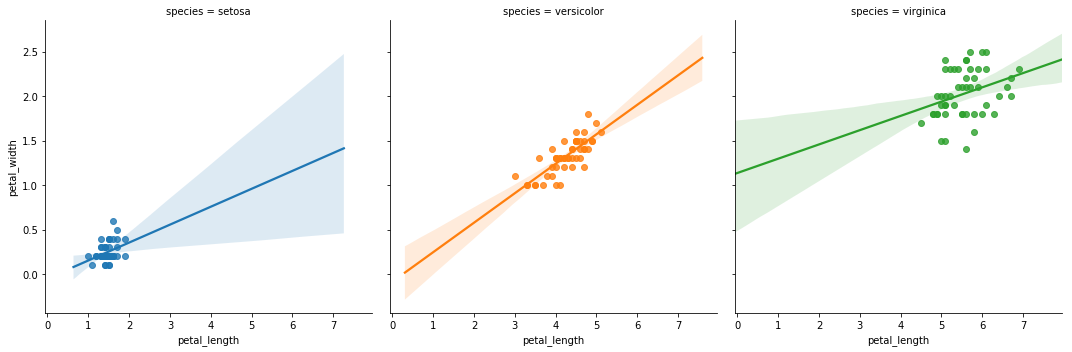

In [5]:
sns.lmplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'species', col = 'species');

**Prepare the data for classification using the pandas operators.**

In [6]:
#Defining data and label

x=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df["species"]

print(x.shape)
print(y.shape)

(150, 4)
(150,)


**KNN**

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)
classifier=neighbors.KNeighborsClassifier()
classifier.fit(x_train,y_train)
predictions=classifier.predict(x_test)

print('The accuracy of the Knn classifier on training data is {:.2f}'.format(classifier.score(x_train, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(classifier.score(x_test, y_test)))
print(accuracy_score(y_test,predictions))

The accuracy of the Knn classifier on training data is 0.97
The accuracy of the Knn classifier on test data is 0.97
0.9666666666666667


In [8]:
print(y_test.value_counts())

##compare predictions to our actual y_test
#number of correct and incorrect predictions
print("Correct Predictions:",(predictions == y_test).sum())
print("Incorrect Predictions:",(predictions != y_test).sum())

virginica     14
setosa         9
versicolor     7
Name: species, dtype: int64
Correct Predictions: 29
Incorrect Predictions: 1


**SVC (Support Vector Machine Classification)**

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)
predict_svm=svm.predict(x_test)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(x_train, y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(x_test, y_test)))


print(y_test.value_counts())

##compare predictions to our actual y_test
#number of correct and incorrect predictions
print("Correct Predictions:",(predictions == y_test).sum())
print("Incorrect Predictions:",(predictions != y_test).sum())

The accuracy of the SVM classifier on training data is 0.98
The accuracy of the SVM classifier on test data is 0.97
virginica     14
setosa         9
versicolor     7
Name: species, dtype: int64
Correct Predictions: 29
Incorrect Predictions: 1


**Gradient Boosting - XGBoost**

In [10]:
#Applying XGBoost
import xgboost as xgb

xgb_class = xgb.XGBClassifier()
xgb_class = xgb_class.fit(x_train, y_train)
predict_xgb = xgb_class.predict(x_test)
print('The accuracy of the XGBoost classifier on training data is {:.2f}'.format(xgb_class.score(x_train, y_train)))
print('The accuracy of the XGBoost classifier on test data is {:.2f}'.format(xgb_class.score(x_test, y_test)))

print(y_test.value_counts())

##compare predictions to our actual y_test
#number of correct and incorrect predictions
print("Correct Predictions:",(predictions == y_test).sum())
print("Incorrect Predictions:",(predictions != y_test).sum())

[15:35:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the XGBoost classifier on training data is 1.00
The accuracy of the XGBoost classifier on test data is 0.97
virginica     14
setosa         9
versicolor     7
Name: species, dtype: int64
Correct Predictions: 29
Incorrect Predictions: 1


/Users/nyarbasi/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


**Decision Tree**

In [11]:
#Applying Decision Tree
from sklearn import tree

dec_tree = tree.DecisionTreeClassifier(criterion='gini')
dec_tree.fit(x_train, y_train)
predict_dec_tree= dec_tree.predict(x_test)

#Print performance
print('The accuracy of the Decision Tree classifier on training data is {:.2f}'.format(dec_tree.score(x_train, y_train)))
print('The accuracy of the Decision Tree classifier on test data is {:.2f}'.format(dec_tree.score(x_test, y_test)))


print(y_test.value_counts())

##compare predictions to our actual y_test
#number of correct and incorrect predictions
print("Correct Predictions:",(predictions == y_test).sum())
print("Incorrect Predictions:",(predictions != y_test).sum())


The accuracy of the Decision Tree classifier on training data is 1.00
The accuracy of the Decision Tree classifier on test data is 0.97
virginica     14
setosa         9
versicolor     7
Name: species, dtype: int64
Correct Predictions: 29
Incorrect Predictions: 1


**Random Forest**

In [12]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
predict_random_forest= random_forest.predict(x_test)

print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(x_train, y_train)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(x_test, y_test)))

print(y_test.value_counts())

##compare predictions to our actual y_test
#number of correct and incorrect predictions
print("Correct Predictions:",(predictions == y_test).sum())
print("Incorrect Predictions:",(predictions != y_test).sum())


The accuracy of the Random Forest classifier on training data is 0.99
The accuracy of the Random Forest classifier on test data is 0.97
virginica     14
setosa         9
versicolor     7
Name: species, dtype: int64
Correct Predictions: 29
Incorrect Predictions: 1


/Users/nyarbasi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors k: 1, 3, 5, 7, 10, 20, 30, 40, and 50:**

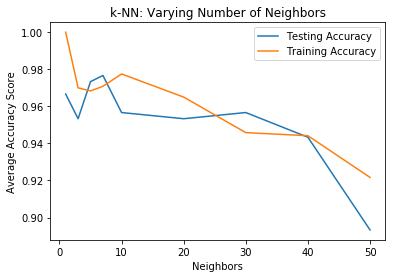

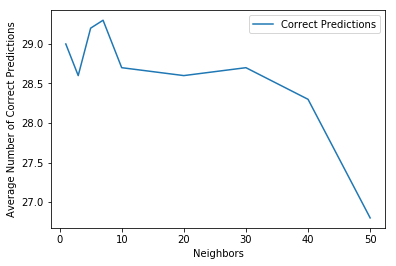

[29.  28.6 29.2 29.3 28.7 28.6 28.7 28.3 26.8]


In [13]:
iris = sns.load_dataset('iris')

#x=df[['sepal_length','sepal_width','petal_length','petal_width']]
#y=df["species"]
# or 
x = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

# Generate 10 random train/test splits for each value of k, 
# Fit the model for each split and generate predictions
# Average the accuracy score for each k
# Calculate the average number of correct predictions for each k as well
no_neighbors = [1, 3, 5, 7, 10, 20, 30, 40, 50]
train_accuracy = np.empty(10)
test_accuracy = np.empty(10)
Corr_predict = np.empty(10)
average_train = np.empty(len(no_neighbors))
average_test = np.empty(len(no_neighbors))
average_pred = np.empty(len(no_neighbors)) 

for i, k in enumerate(no_neighbors):
    
    for j in range(10):   
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train,y_train)
        Corr_predict[j]=(knn.predict(x_test) == y_test).sum()
        train_accuracy[j] = knn.score(x_train, y_train)
        test_accuracy[j] = knn.score(x_test, y_test)
        
    average_pred[i] = Corr_predict.mean()    
    average_train[i] = train_accuracy.mean()
    average_test[i] = test_accuracy.mean()
    
# Visualization of k values vs accuracy
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, average_test, label = 'Testing Accuracy')
plt.plot(no_neighbors, average_train, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Average Accuracy Score')
plt.show()

# Visualization of Average Number of Correct Predictions vs k values
plt.plot(no_neighbors, average_pred, label = 'Correct Predictions')
plt.legend()
plt.ylabel('Average Number of Correct Predictions')
plt.xlabel('Neighbors')
plt.show()

print(average_pred)

Based on the k values vs accuracy plot above, we can see that for smaller k values (the closest neighbors), the accuracy is higher. Hence, if we take a lot of neighbors, we will take neighbors that are far apart for large values of k, which are irrelevant.